In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1. load the cleaned data and drop the 3 features for next analysis

In [2]:
df = pd.read_csv(r'C:\\Users\dongw\OneDrive\Documents\2. Programming\Springboard\DS\Lending Club Loan\data\df_eda.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default
0,3600.0,36,13.99,123.03,C,C4,10,MORTGAGE,55000.0,2015-12-01,...,3.0,4.0,9.0,3.0,76.9,0.0,7746.0,2400.0,13734.0,0
1,24700.0,36,11.99,820.28,C,C1,10,MORTGAGE,65000.0,2015-12-01,...,6.0,20.0,27.0,2.0,97.4,7.7,39475.0,79300.0,24667.0,0
2,20000.0,60,10.78,432.66,B,B4,10,MORTGAGE,63000.0,2015-12-01,...,6.0,4.0,7.0,0.0,100.0,50.0,18696.0,6200.0,14877.0,0
3,10400.0,60,22.45,289.91,F,F1,3,MORTGAGE,104433.0,2015-12-01,...,10.0,7.0,19.0,4.0,96.6,60.0,95768.0,20300.0,88097.0,0
4,11950.0,36,13.44,405.18,C,C3,4,RENT,34000.0,2015-12-01,...,2.0,4.0,4.0,0.0,100.0,100.0,12798.0,9400.0,4000.0,0


In [4]:
df.drop(columns = 'loan_status', axis =1, inplace=True)

In [5]:
df.shape

(1369566, 52)

In [6]:
#select the category variables
df.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'home_ownership', 'issue_d', 'purpose',
       'addr_state', 'application_type'],
      dtype='object')

In [7]:
df.select_dtypes('float64').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_prncp', 'total_rec_int', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object')

In [8]:
df.select_dtypes('int64').columns

Index(['term', 'emp_length', 'Default'], dtype='object')

In [9]:
#drop unnessary predictors before pre-processing
drop_list = ['grade','addr_state']
df.drop(columns = drop_list, inplace=True)

In [10]:
df.shape

(1369566, 50)

2. Check for missing values and create dummy features (Categorical variables)

There is no categorical variables missing. Therefore, we don't need to crated NaN dummy variables. We will create dummy variables for categorical variables.

In [11]:
#df_X = df.drop(['Default'], axis =1)
df_dummies = pd.get_dummies(df, columns=['sub_grade', 'home_ownership', 'purpose', 'application_type'], drop_first = True)
df_dummies.shape

(1369566, 88)

In [12]:
df_dummies.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,fico_range_low,...,sub_grade_G4,sub_grade_G5,home_ownership_OWN,home_ownership_RENT,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,purpose_small_business,application_type_Joint App
0,3600.0,36,13.99,123.03,10,55000.0,2015-12-01,5.91,0.0,675.0,...,0,0,0,0,1,0,0,0,0,0
1,24700.0,36,11.99,820.28,10,65000.0,2015-12-01,16.06,1.0,715.0,...,0,0,0,0,0,0,0,0,1,0
2,20000.0,60,10.78,432.66,10,63000.0,2015-12-01,10.78,0.0,695.0,...,0,0,0,0,0,1,0,0,0,1
3,10400.0,60,22.45,289.91,3,104433.0,2015-12-01,25.37,1.0,695.0,...,0,0,0,0,0,0,1,0,0,0
4,11950.0,36,13.44,405.18,4,34000.0,2015-12-01,10.20,0.0,690.0,...,0,0,0,1,1,0,0,0,0,0


In [13]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
#missing.sort_values(by='count', ascending = False).head(10)
print(missing[missing['%'] > 0].sort_values(by='count', ascending = False))

                             count          %
mths_since_last_delinq      690126  50.390124
mths_since_recent_inq       178574  13.038729
mo_sin_old_il_acct          109109   7.966684
pct_tl_nvr_dlq               70430   5.142505
avg_cur_bal                  70299   5.132940
mo_sin_rcnt_rev_tl_op        70277   5.131334
num_rev_accts                70277   5.131334
mo_sin_old_rev_tl_op         70277   5.131334
mo_sin_rcnt_tl               70276   5.131261
num_tl_op_past_12m           70276   5.131261
num_op_rev_tl                70276   5.131261
num_il_tl                    70276   5.131261
num_bc_tl                    70276   5.131261
num_actv_rev_tl              70276   5.131261
num_actv_bc_tl               70276   5.131261
num_accts_ever_120_pd        70276   5.131261
total_il_high_credit_limit   70276   5.131261
total_rev_hi_lim             70276   5.131261
tot_cur_bal                  70276   5.131261
bc_util                      64983   4.744788
percent_bc_gt_75             64617

In [14]:
missinglist = missing[missing['%'] > 0].sort_values(by='count', ascending = False).index.tolist()
len(missinglist)

35

In [15]:
nunique = pd.DataFrame(df.nunique().sort_values(ascending = False))
nunique.columns=['count']

In [16]:
nunique.head()

,count
total_rec_int,523499
tot_cur_bal,402890
total_rec_prncp,220290
total_bal_ex_mort,178967
total_il_high_credit_limit,163471


num variables are number of accounts/cards/etc. 

In [17]:
num_list = [x for x in missinglist if 'num' in x]

In [18]:
num_list

['num_rev_accts',
 'num_tl_op_past_12m',
 'num_op_rev_tl',
 'num_il_tl',
 'num_bc_tl',
 'num_actv_rev_tl',
 'num_actv_bc_tl',
 'num_accts_ever_120_pd',
 'num_bc_sats']

mths_since_last_delinq and mths_since_recent_inq have the most missing values, all features are month-related list, we will use arbitrary values, -1 which doesnt exist in the dataset.

In [19]:
month_list = [x for x in missinglist if 'mo_' in x or 'mths' in x]

In [20]:
month_list 

['mths_since_last_delinq',
 'mths_since_recent_inq',
 'mo_sin_old_il_acct',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'acc_open_past_24mths',
 'inq_last_6mths']

what features left in the missing list after extrat month, num_list

In [21]:
miss_mo_nu = list(set(missinglist) - set(month_list) - set(num_list))

miss_mo_nu

Just noticed that some variables in the miss_mo_nu list, may contain ordinal type, we use unique values less than 100 to extract them

In [22]:
uni100 = nunique[nunique['count'] < 100].index.tolist()

There are 3 variables in the list 'miss_mo_nu' that will be combined with 'num' variables and then will be imputed with most frequent values

In [23]:
unilist = [x for x in uni100 if x in miss_mo_nu]
unilist

['open_acc', 'mort_acc', 'delinq_2yrs']

In [24]:
fre = num_list + unilist # fre list will be imputed with most frequent values, ordinal values, with 'average' seen values

all other variables, we consider them as numeric variables, and use median values for imputation.

In [25]:
median_im = list(set(miss_mo_nu) - set(uni100))

In [26]:
median_im

['total_bal_ex_mort',
 'pct_tl_nvr_dlq',
 'dti',
 'avg_cur_bal',
 'bc_util',
 'tot_cur_bal',
 'percent_bc_gt_75',
 'revol_util',
 'annual_inc',
 'total_il_high_credit_limit',
 'bc_open_to_buy',
 'total_acc',
 'total_bc_limit',
 'total_rev_hi_lim']

Now, missinglist is divided into 3 parts with different ways for imputation

In [27]:
len(median_im)+len(fre)+len(month_list) #double check the length of 3 list, should equal to len(missinglist)

35

Now, we find variables that have missing values and have less than 100 unique values, this is to prepare for imputing the NaN values with most frequenct values.

3. split training and test data 

before split the data, look at how they the default rate change in different years.

In [28]:
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')

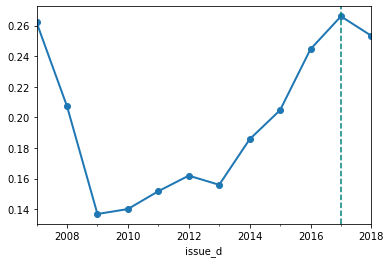

In [29]:
df.groupby(pd.Grouper(key = 'issue_d', freq='A'))['Default'].mean().sort_index().plot.line(marker='o', lw = 2)
plt.axvline(x='2017', ls = '--' , c = 'teal')
figsize = (10, 8)

There is a clear decrease of default after 2017, it was argued to be due to the fact that defaults are a stochastic
cumulative process and that, with loans of 36–60-month term, most loans issued in that period did not have the time to default
yet. Exlude the 2018 would help avoid bias.

In [30]:
#remove the year after 2017-12-31
df_dummies = df_dummies.loc[df_dummies['issue_d'] < '2018-01-01']
print(df_dummies.shape)

(1306027, 88)


In [31]:
#remove the 'issue_d'
df_dummies.drop('issue_d', axis =1, inplace = True)

In [32]:
#remove outlier in 'dti', dti has negative value, high debt to income (dti) ratio may be not reliable and consider as outlier. 
df_dummies = df_dummies.loc[(df_dummies['dti'] < df_dummies['dti'].quantile(0.99)) & (df_dummies['dti'] >= 0)]

In [33]:
df_dummies.shape

(1292723, 87)

In [34]:
#Split the train and test datasets

X = df_dummies.drop('Default', axis=1)
y = df_dummies['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [35]:
print('Number of loans in traininng and test partition is: ', X_train.shape[0] , '+', X_test.shape[0])
print('Numeber of loans in whole dataset: ', df_dummies.shape[0])

Number of loans in traininng and test partition is:  1034178 + 258545
Numeber of loans in whole dataset:  1292723


Check for duplicated rows

In [36]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,issue_d,purpose,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default


There are no duplicates

fill missing values by most frequent imputation which is decided by earlier with countable unique values (ordinal varieibles)

In [37]:
X_train[median_im] = X_train[median_im].fillna(X_train[median_im].median())
X_test[median_im] = X_test[median_im].fillna(X_train[median_im].median())

C:\Users\dongw\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
X_train[month_list] = X_train[month_list].fillna(-1)
X_test[month_list] = X_test[month_list].fillna(-1)

In [39]:
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col

In [40]:
X_train = X_train.apply(lambda fre: fillna(fre))

In [41]:
X_test = X_test.apply(lambda fre: fillna(fre))

In [42]:
missing = pd.concat([X_train.isnull().sum(), 100 * X_train.isnull().mean()], axis=1)
missing.columns=['count', '%']
#missing.sort_values(by='count', ascending = False).head(10)
print(missing[missing['%'] > 0].sort_values(by='count', ascending = False))

Empty DataFrame
Columns: [count, %]
Index: []


In [43]:
print('null values ', X_train.isnull().sum())

null values  loan_amnt                     0
term                          0
int_rate                      0
installment                   0
emp_length                    0
                             ..
purpose_home_improvement      0
purpose_major_purchase        0
purpose_other                 0
purpose_small_business        0
application_type_Joint App    0
Length: 86, dtype: int64


In [44]:
print('null values ', X_test.isnull().sum())

null values  loan_amnt                     0
term                          0
int_rate                      0
installment                   0
emp_length                    0
                             ..
purpose_home_improvement      0
purpose_major_purchase        0
purpose_other                 0
purpose_small_business        0
application_type_Joint App    0
Length: 86, dtype: int64


list 'im_median' and 'im_fre' is imputed with median and most frequent values, respectively, and null values is zero.

4. Scale the data, as the features measured in many different units, with numbers that vary by orders of magnitude, start off by scaling them to put them all on a consistent scale. The StandardScaler scales each feature to zero mean and unit variance.

In [45]:
numeric_list = list(X_train.select_dtypes('float64').columns)

In [46]:
len(numeric_list)

42

In [47]:
scale_list = list(set(numeric_list) - set(fre) - set(month_list))

In [48]:
len(scale_list)

21

In [49]:
scale_list

['loan_amnt',
 'installment',
 'bc_util',
 'bc_open_to_buy',
 'total_rec_prncp',
 'int_rate',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'avg_cur_bal',
 'total_il_high_credit_limit',
 'total_acc',
 'total_bc_limit',
 'total_bal_ex_mort',
 'total_rec_int',
 'percent_bc_gt_75',
 'annual_inc',
 'revol_util',
 'fico_range_low',
 'pct_tl_nvr_dlq',
 'revol_bal',
 'dti']

In [50]:
scaler = StandardScaler()
X_train[scale_list] = scaler.fit_transform(X_train[scale_list])
X_test[scale_list] = scaler.transform(X_test[scale_list])

In [51]:
X_train.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,...,sub_grade_G4,sub_grade_G5,home_ownership_OWN,home_ownership_RENT,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,purpose_small_business,application_type_Joint App
271091,2.379268,60,2.277651,2.186724,3,1.047816,0.654112,0.0,-0.972738,2.0,...,0,0,0,1,1,0,0,0,0,0
274766,1.281527,60,2.679703,1.245445,3,-0.218831,0.210865,0.0,-1.131750,0.0,...,0,0,0,0,0,1,0,0,0,0
529591,-1.318386,36,0.591146,-1.277650,7,-0.627289,1.311046,0.0,-0.495701,5.0,...,0,0,1,0,1,0,0,0,0,0
982636,-0.740628,36,1.431224,-0.540466,0,-0.446543,-1.133529,1.0,-0.972738,0.0,...,0,0,1,0,0,0,0,1,0,0
125648,-0.601966,36,-1.129216,-0.576756,0,-0.642944,-0.116380,0.0,1.253435,0.0,...,0,0,0,1,1,0,0,0,0,0


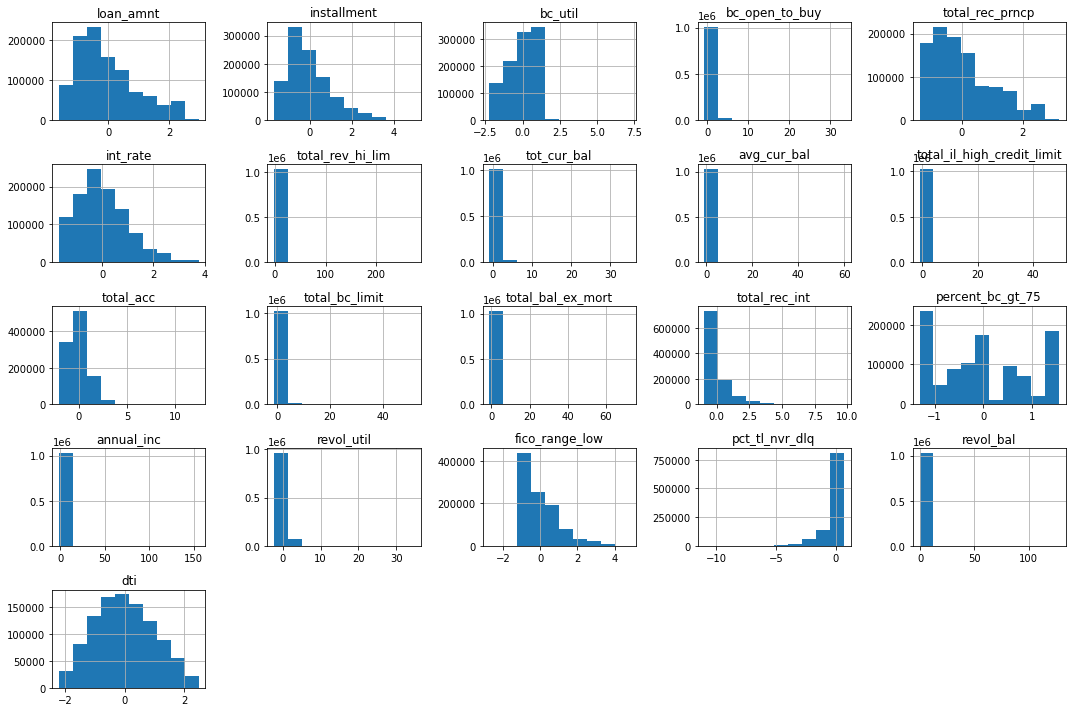

In [52]:
X_train[scale_list].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

some of the values are skewed data, we might compare non-log transform feature and log transform feature while evaluate the model performance.

1. logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform


Pipe_lr = make_pipeline(
    SelectKBest(f_classif),
    LogisticRegression(
    max_iter=1000,
    tol = 0.1))

In [54]:
Pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'logisticregression', 'selectkbest__k', 'selectkbest__score_func', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [63]:
#k = [k+1 for k in range(len(X_train.columns))]
distributions = {'selectkbest__k': [10, 30], 'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__random_state': [42], 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear']}
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)

In [64]:
lr_grid_cv = RandomizedSearchCV(Pipe_lr, distributions, cv=cv, n_jobs= -1)

In [65]:
result = lr_grid_cv.fit(X_train, y_train)

In [66]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9926168415881985
Best Hyperparameters: {'selectkbest__k': 30, 'logisticregression__solver': 'newton-cg', 'logisticregression__random_state': 42, 'logisticregression__penalty': 'l2'}


In [74]:
#k = [k+1 for k in range(len(X_train.columns))]
grid = {'selectkbest__k': [20, 30, 40, 50, 60], 'logisticregression__penalty': ['l2'], 'logisticregression__random_state': [42], 'logisticregression__solver': ['newton-cg']}
cv3 = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=2, random_state=1)

In [76]:
lr_grid_search = GridSearchCV(Pipe_lr, param_grid=grid, cv=cv3, n_jobs= -1)

In [77]:
result3 = lr_grid_search.fit(X_train, y_train)

In [78]:
print('Best Score: %s' % result3.best_score_)
print('Best Hyperparameters: %s' % result3.best_params_)

Best Score: 0.9943317300846009
Best Hyperparameters: {'logisticregression__penalty': 'l2', 'logisticregression__random_state': 42, 'logisticregression__solver': 'newton-cg', 'selectkbest__k': 60}


In [79]:
score_mean = lr_grid_search.cv_results_['mean_test_score']
score_std = lr_grid_search.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_search.cv_results_['param_selectkbest__k']]

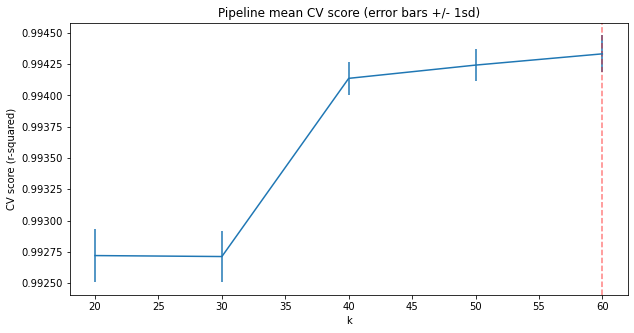

In [80]:
best_k = lr_grid_search.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [85]:
y_pred = lr_grid_search.best_estimator_.predict(X_test)
y_probas = lr_grid_search.best_estimator_.predict_proba(X_test)
print (y_pred.shape, y_probas.shape)

(258545,) (258545, 2)


In [87]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, accuracy_score

# Evaluate predictions
print ('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print ('F1 score: %.5f' % f1_score(y_test, y_pred))
print ('AUROC: %.5f' % roc_auc_score(y_test, y_probas[:, 1]))
print ('AUPRC: %.5f' % average_precision_score(y_test, y_probas[:, 1]))

Accuracy: 0.99416
F1 score: 0.98592
AUROC: 0.99801
AUPRC: 0.99684


In [92]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    204435
           1       1.00      0.98      0.99     54110

    accuracy                           0.99    258545
   macro avg       0.99      0.99      0.99    258545
weighted avg       0.99      0.99      0.99    258545



In [103]:
#combine Training set back
Train = pd.concat([X_train, y_train],axis=1)
test = pd.concat([X_test, y_test],axis=1)

In [104]:
Train.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,...,sub_grade_G5,home_ownership_OWN,home_ownership_RENT,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,purpose_small_business,application_type_Joint App,Default
271091,2.379268,60,2.277651,2.186724,3,1.047816,0.654112,0.0,-0.972738,2.0,...,0,0,1,1,0,0,0,0,0,1
274766,1.281527,60,2.679703,1.245445,3,-0.218831,0.210865,0.0,-1.131750,0.0,...,0,0,0,0,1,0,0,0,0,0
529591,-1.318386,36,0.591146,-1.277650,7,-0.627289,1.311046,0.0,-0.495701,5.0,...,0,1,0,1,0,0,0,0,0,0
982636,-0.740628,36,1.431224,-0.540466,0,-0.446543,-1.133529,1.0,-0.972738,0.0,...,0,1,0,0,0,0,1,0,0,0
125648,-0.601966,36,-1.129216,-0.576756,0,-0.642944,-0.116380,0.0,1.253435,0.0,...,0,0,1,1,0,0,0,0,0,0


In [106]:
test.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,...,sub_grade_G5,home_ownership_OWN,home_ownership_RENT,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,purpose_small_business,application_type_Joint App,Default
786813,0.617105,36,-0.050022,0.874623,0,-0.446386,-0.297098,0.0,-0.654713,0.0,...,0,0,1,1,0,0,0,0,0,0
471302,0.091344,36,0.648280,0.379477,10,-0.546166,0.291456,1.0,-1.131750,2.0,...,0,1,0,1,0,0,0,0,0,1
112003,-0.509524,60,-0.358968,-0.837208,10,0.407377,-0.002821,0.0,-0.177676,0.0,...,0,0,1,0,0,0,0,0,0,0
1152149,2.379268,36,0.233531,2.936979,10,0.905496,0.033811,0.0,-0.177676,0.0,...,0,0,0,0,0,0,0,0,0,0
350871,0.645993,36,-1.522805,0.656843,8,-0.489238,0.637018,0.0,1.889484,0.0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
compression_opts = dict(method='zip',
                        archive_name='train_df.csv')  
Train.to_csv('train_df.zip', index=False,
          compression=compression_opts)  

In [108]:
compression_opts = dict(method='zip',
                        archive_name='test_df.csv')  
test.to_csv('test_df.zip', index=False,
          compression=compression_opts)  

Logreg model with random and grid search, showing the Best Score: 0.9943317300846009 and Best Hyperparameters: {'logisticregression__penalty': 'l2', 'logisticregression__random_state': 42, 'logisticregression__solver': 'newton-cg', 'selectkbest__k': 60}. Using this model, predit both classes at high accuracy. 